Error during initial read_csv: [Errno 2] No such file or directory: 'taobao_user_behavior.csv'
--- 数据概览 ---
数据前5行:
    user_id    item_id  behavior_type  item_category           time  \
0   user_id    item_id  behavior_type  item_category           time   
1  98047837  232431562              1           4245  2014-12-06 02   
2  97726136  383583590              1           5894  2014-12-09 20   
3  98607707   64749712              1           2883  2014-12-18 11   
4  98662432  320593836              1           6562  2014-12-06 10   

  behavior_name  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  

数据信息 (类型、非空值) - 加载后:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256907 entries, 0 to 12256906
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   user_id        object
 1   item_id        object
 2   behavior_type  object
 3   item_category  object
 4   time           object
 5   behavior_name  objec

C:\Users\21711\AppData\Local\Temp\ipykernel_28380\287746602.py:35: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] = pd.to_datetime(df['time'])


自动转换失败: Unknown datetime string format, unable to parse: time, at position 0
尝试使用指定格式转换: %Y-%m-%d %H
警告: 在转换时有 1 个值无法解析，已设为 NaT。

数据信息 (类型、非空值) - 转换后:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256907 entries, 0 to 12256906
Data columns (total 6 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        object        
 1   item_id        object        
 2   behavior_type  object        
 3   item_category  object        
 4   time           datetime64[ns]
 5   behavior_name  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 561.1+ MB

提取 date 和 hour...

--- 数据预处理完成，添加了 behavior_name, date, hour 列 ---
    user_id    item_id  behavior_type  item_category                time  \
0   user_id    item_id  behavior_type  item_category                 NaT   
1  98047837  232431562              1           4245 2014-12-06 02:00:00   
2  97726136  383583590              1           5894 2014-12-09 20:00:00   
3  98607707   64749712

C:\Users\21711\AppData\Local\Temp\ipykernel_28380\287746602.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=behavior_counts.index, y=behavior_counts.values, palette='viridis')


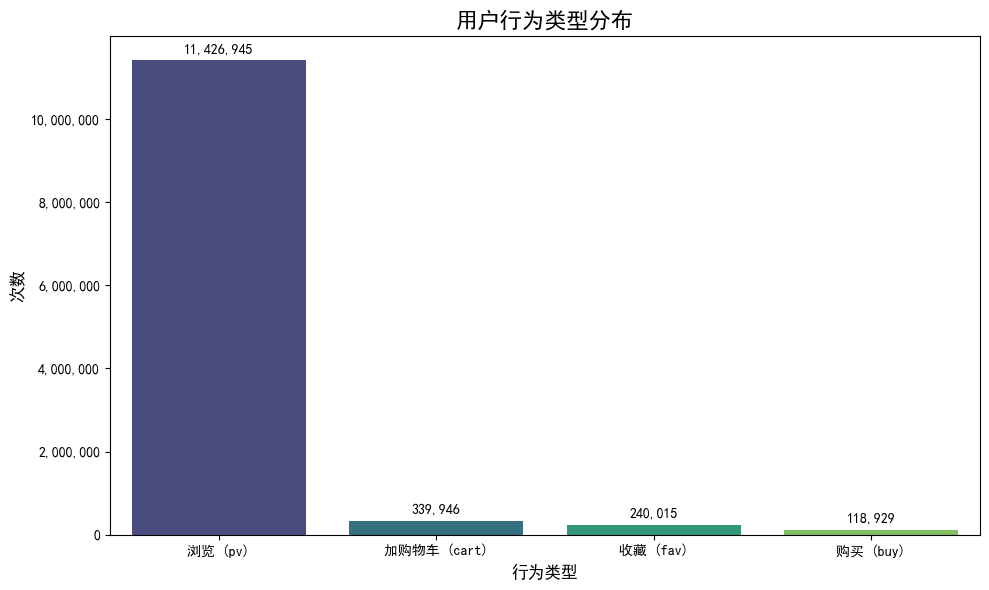

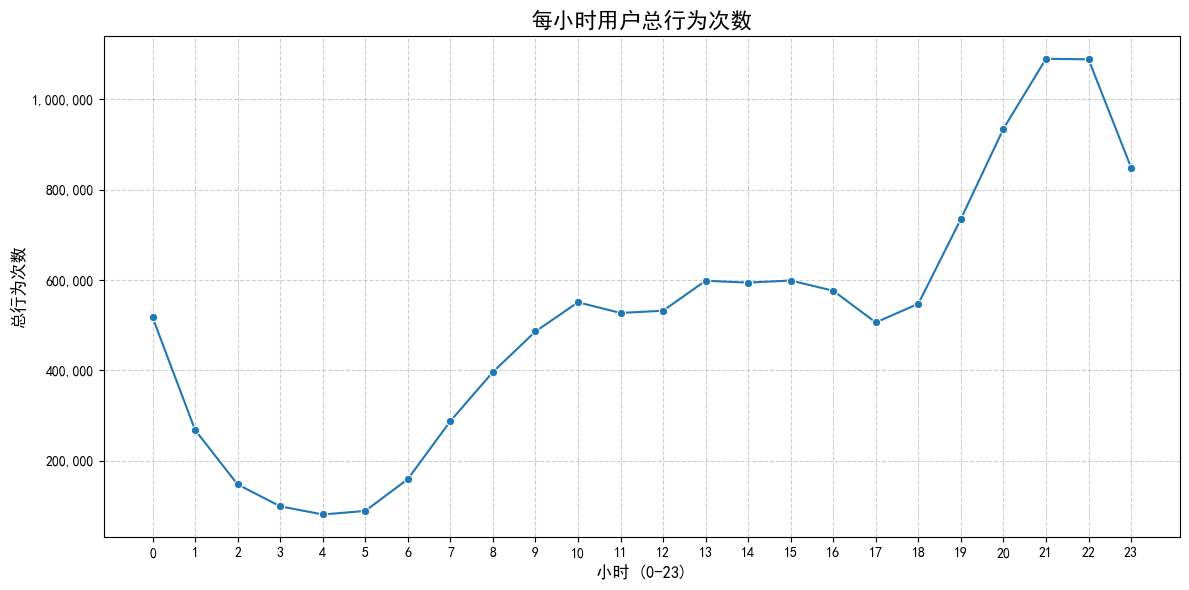

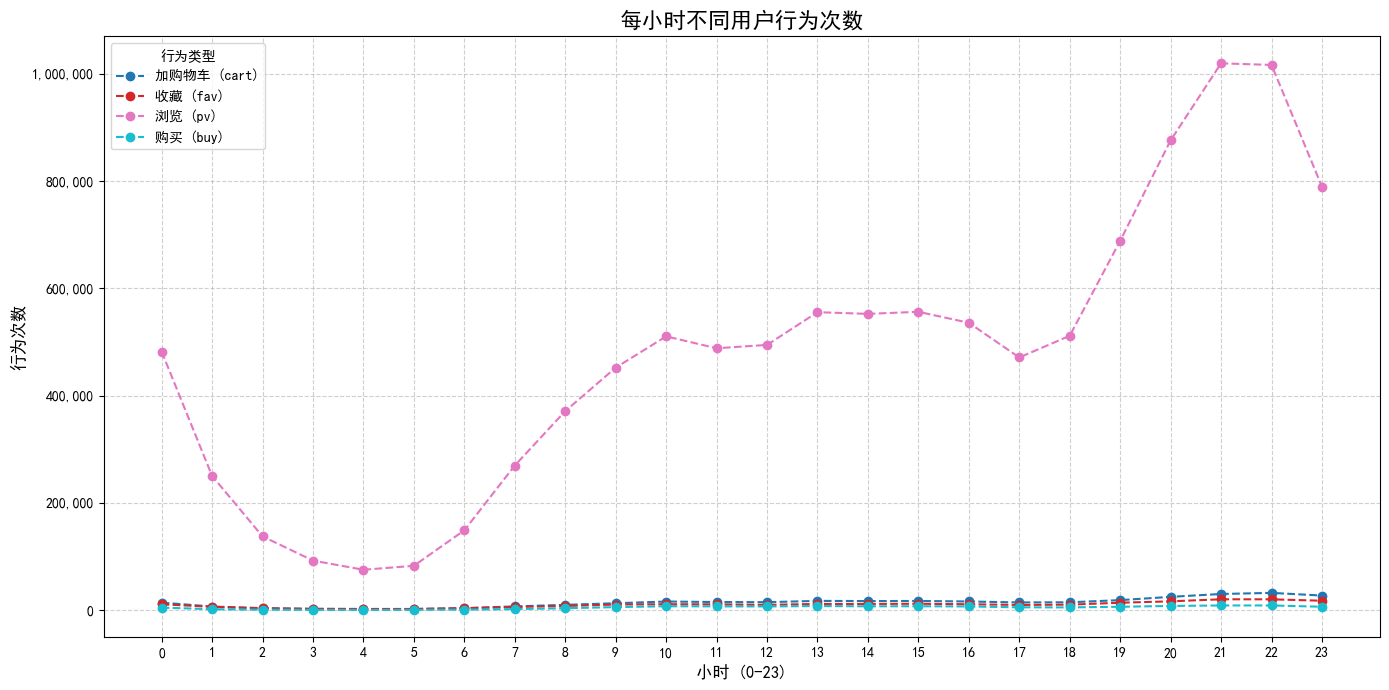

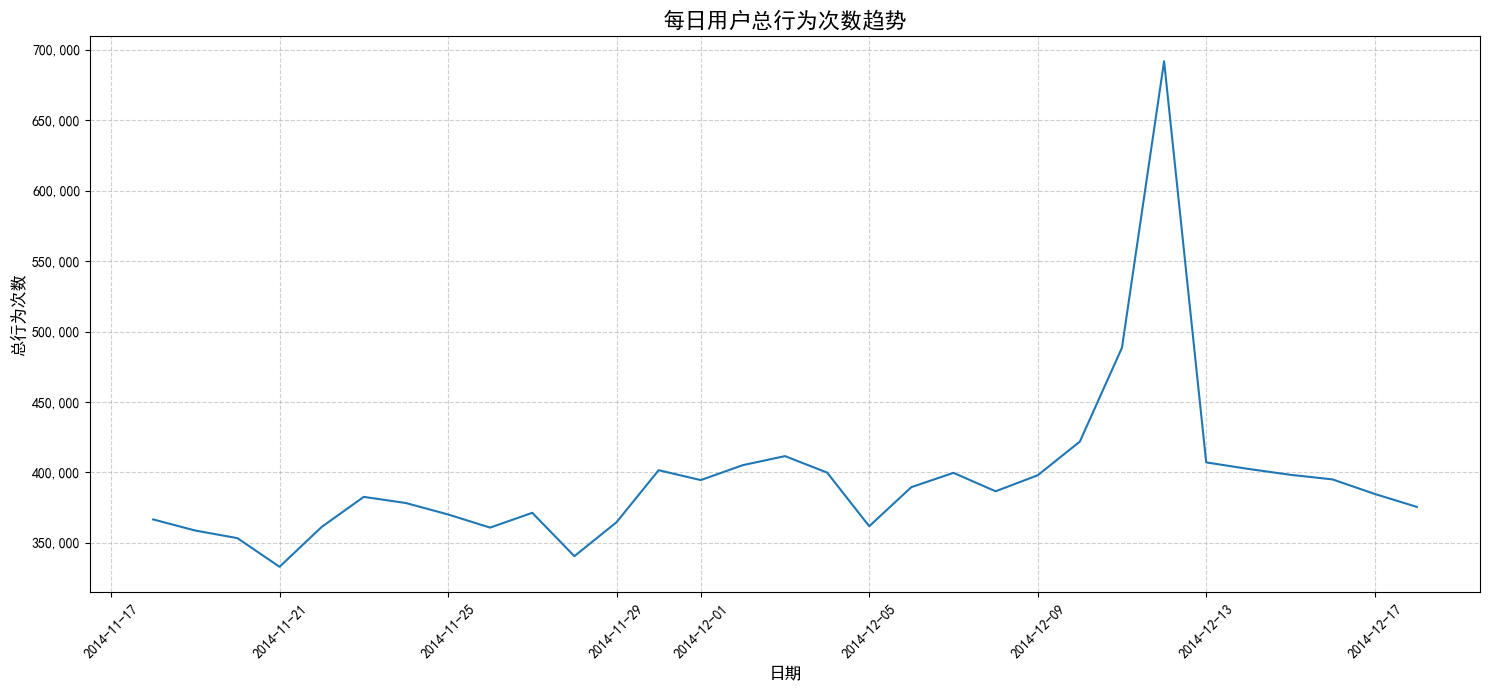

C:\Users\21711\AppData\Local\Temp\ipykernel_28380\287746602.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_counts.index.astype(str), x=category_counts.values, orient='h', palette='magma')


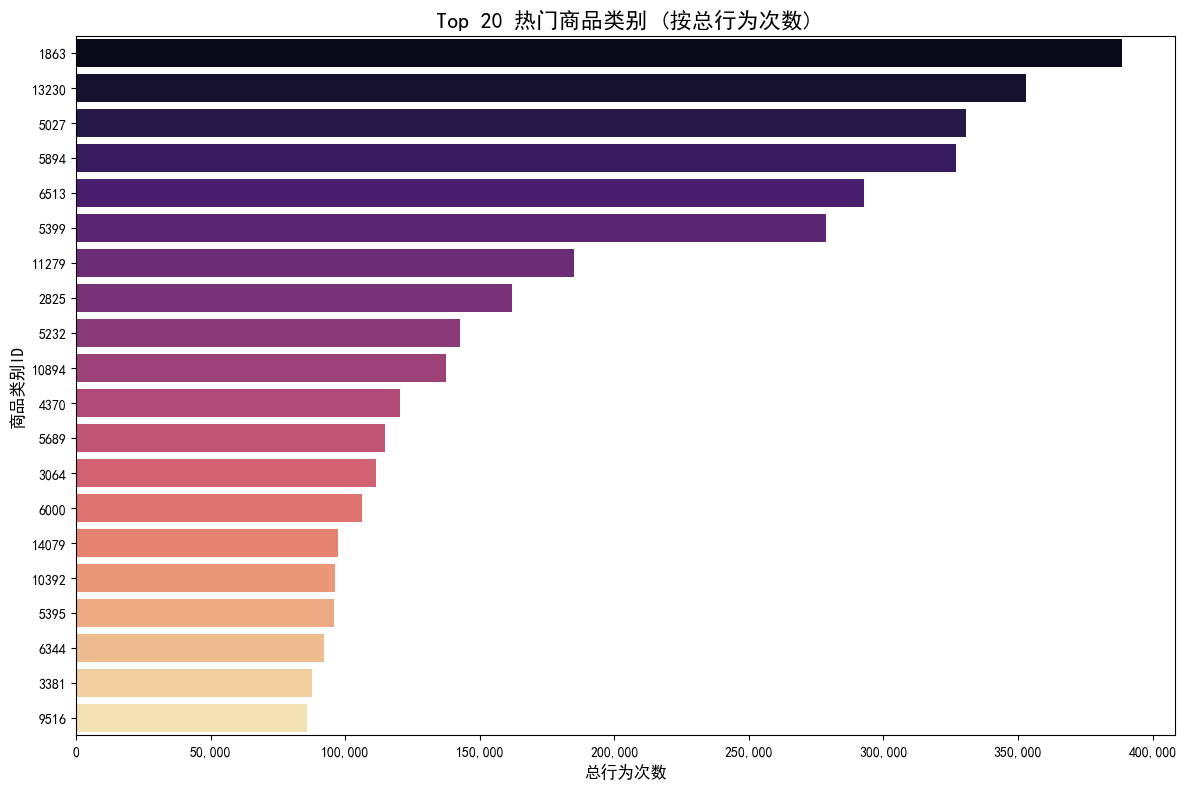

C:\Users\21711\AppData\Local\Temp\ipykernel_28380\287746602.py:160: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_purchase_categories.index.astype(str), x=top_purchase_categories.values, orient='h', palette='coolwarm')


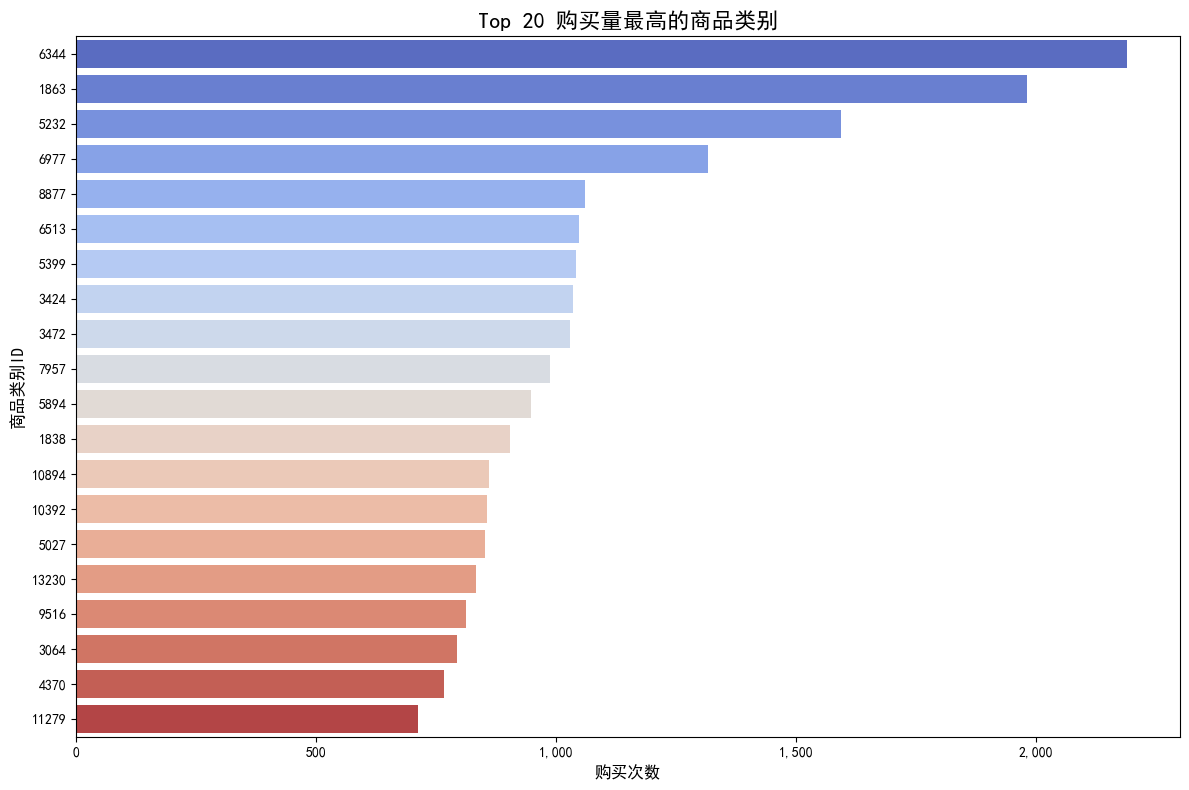


--- 购物漏斗分析 (基于独立用户) ---
浏览用户数 (PV Users): 10,000
收藏/加购用户数 (Cart/Fav Users): 9,318
购买用户数 (Buy Users): 8,875
------------------------------
浏览 -> 收藏/加购 转化率: 93.18%
浏览 -> 购买 转化率: 88.75%
收藏/加购 -> 购买 转化率: 95.25%


C:\Users\21711\AppData\Local\Temp\ipykernel_28380\287746602.py:202: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=funnel_stages, y=funnel_users, palette='Blues_r')


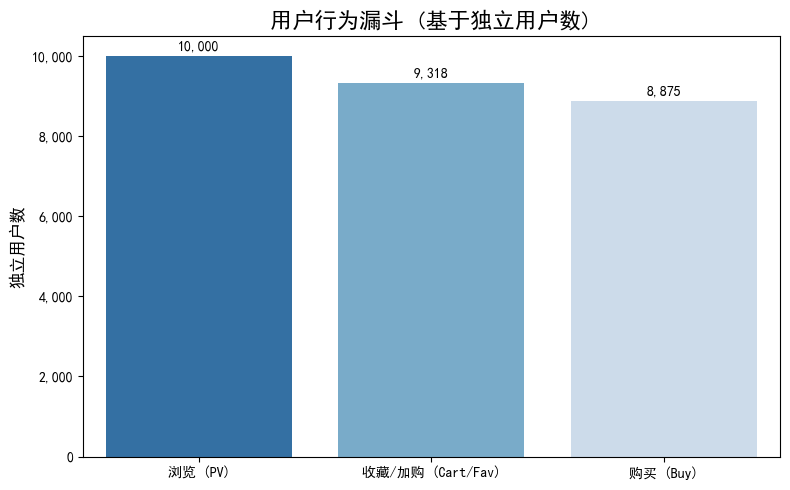


--- 分析结束 ---


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# --- 1. 加载数据 ---
column_names = ['user_id', 'item_id', 'behavior_type', 'item_category', 'time']
file_path = 'D:\\coding\\Study_code\\HUAT-kerwin-labwork\\数据分析与可视化课程设计\\user_action.csv' # <--- 确保路径正确)
try:
    # 仍然尝试在读取时解析，但如果后续检查发现类型不对，我们会强制转换
    df = pd.read_csv(file_path, names=column_names, header=None, parse_dates=['time'])
except UnicodeDecodeError:
    print("UTF-8 decoding failed, trying GBK encoding...")
    df = pd.read_csv(file_path, names=column_names, header=None, parse_dates=['time'], encoding='gbk')
except Exception as e:
    print(f"Error during initial read_csv: {e}")
    # 如果读取出错，或者不确定parse_dates是否有效，可以先不加parse_dates
    # df = pd.read_csv(file_path, names=column_names, header=None, encoding='gbk')


# --- 2. 数据概览与预处理 ---
print("--- 数据概览 ---")
print("数据前5行:")
print(df.head())
print("\n数据信息 (类型、非空值) - 加载后:")
df.info() # <--- 检查 'time' 列的 Dtype 是什么

# ******** 添加显式转换和检查 ********
print("\n检查并转换 'time' 列数据类型...")
if not pd.api.types.is_datetime64_any_dtype(df['time']):
    print(f"初始 'time' 列类型为: {df['time'].dtype}。 尝试转换为 datetime...")
    try:
        # 尝试自动转换
        df['time'] = pd.to_datetime(df['time'])
    except ValueError as e:
        print(f"自动转换失败: {e}")
        # 如果自动转换失败，尝试指定格式 (基于你的示例 '2014-12-06 02')
        time_format = '%Y-%m-%d %H'
        print(f"尝试使用指定格式转换: {time_format}")
        try:
            df['time'] = pd.to_datetime(df['time'], format=time_format, errors='coerce')
            # errors='coerce' 会将无法解析的值变成 NaT (Not a Time)
            invalid_times = df['time'].isnull().sum()
            if invalid_times > 0:
                print(f"警告: 在转换时有 {invalid_times} 个值无法解析，已设为 NaT。")
        except Exception as e_fmt:
            print(f"使用指定格式转换也失败了: {e_fmt}")
            print("请检查 'time' 列的数据格式是否与预期一致。")
            # 如果仍然失败，后续的 .dt 操作会出错，可能需要进一步数据清洗
else:
    print("'time' 列已经是 datetime 类型。")

print("\n数据信息 (类型、非空值) - 转换后:")
df.info() # <--- 再次检查 'time' 列的 Dtype 是否变为 datetime64[ns]
# ******** 转换和检查结束 ********


# 只有在 'time' 列确实是 datetime 类型后才继续
if pd.api.types.is_datetime64_any_dtype(df['time']):
    # 将 behavior_type 转换为更有意义的标签
    behavior_mapping = {1: '浏览 (pv)', 2: '收藏 (fav)', 3: '加购物车 (cart)', 4: '购买 (buy)'}
    df['behavior_name'] = df['behavior_type'].map(behavior_mapping)

    # 提取日期和小时信息，用于后续分析
    print("\n提取 date 和 hour...")
    df['date'] = df['time'].dt.date # <--- 现在这里应该可以工作了
    df['hour'] = df['time'].dt.hour # <--- 现在这里应该可以工作了

    print("\n--- 数据预处理完成，添加了 behavior_name, date, hour 列 ---")
    print(df.head())

    # --- 3. 用户行为类型分析 ---
    plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置中文字体
    plt.rcParams['axes.unicode_minus'] = False

    behavior_counts = df['behavior_name'].value_counts()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=behavior_counts.index, y=behavior_counts.values, palette='viridis')
    plt.title('用户行为类型分布', fontsize=16)
plt.xlabel('行为类型', fontsize=12)
plt.ylabel('次数', fontsize=12)
# 在柱状图上添加数值标签
for index, value in enumerate(behavior_counts.values):
    plt.text(index, value + (behavior_counts.values.max() * 0.01), f'{value:,}', ha='center', va='bottom', fontsize=10)
# 格式化Y轴，添加千位分隔符
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout() # 调整布局防止标签重叠
plt.show()


# --- 4. 时间维度分析 ---

# 4.1 每小时用户活跃度
hourly_activity = df.groupby('hour')['user_id'].count()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_activity.index, y=hourly_activity.values, marker='o')
plt.title('每小时用户总行为次数', fontsize=16)
plt.xlabel('小时 (0-23)', fontsize=12)
plt.ylabel('总行为次数', fontsize=12)
plt.xticks(range(0, 24)) # 确保显示所有小时
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.show()

# 4.2 每小时不同用户行为类型的次数 (可选，更细致的分析)
hourly_behavior_counts = df.groupby(['hour', 'behavior_name'])['user_id'].count().unstack()
hourly_behavior_counts.plot(kind='line', figsize=(14, 7), marker='o', linestyle='--', colormap='tab10')
plt.title('每小时不同用户行为次数', fontsize=16)
plt.xlabel('小时 (0-23)', fontsize=12)
plt.ylabel('行为次数', fontsize=12)
plt.xticks(range(0, 24))
plt.legend(title='行为类型')
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.show()


# 4.3 每日用户活跃度
daily_activity = df.groupby('date')['user_id'].count()

plt.figure(figsize=(15, 7))
sns.lineplot(x=daily_activity.index, y=daily_activity.values)
plt.title('每日用户总行为次数趋势', fontsize=16)
plt.xlabel('日期', fontsize=12)
plt.ylabel('总行为次数', fontsize=12)
plt.xticks(rotation=45) # 日期标签可能较多，旋转一下
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.show()


# --- 5. 商品类别分析 ---

# 5.1 Top N 热门商品类别 (按总行为次数)
top_n = 20
category_counts = df['item_category'].value_counts().head(top_n)

plt.figure(figsize=(12, 8))
# 使用水平条形图，方便阅读类别ID
sns.barplot(y=category_counts.index.astype(str), x=category_counts.values, orient='h', palette='magma')
plt.title(f'Top {top_n} 热门商品类别 (按总行为次数)', fontsize=16)
plt.xlabel('总行为次数', fontsize=12)
plt.ylabel('商品类别ID', fontsize=12)
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.show()

# 5.2 Top N 热门商品类别 (按购买次数)
# 先筛选出购买行为
purchase_df = df[df['behavior_type'] == 4]
top_purchase_categories = purchase_df['item_category'].value_counts().head(top_n)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_purchase_categories.index.astype(str), x=top_purchase_categories.values, orient='h', palette='coolwarm')
plt.title(f'Top {top_n} 购买量最高的商品类别', fontsize=16)
plt.xlabel('购买次数', fontsize=12)
plt.ylabel('商品类别ID', fontsize=12)
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.show()


# --- 6. 转化漏斗分析 (基于独立用户数) ---
# 统计每个阶段的独立用户数
pv_users = df[df['behavior_type'] == 1]['user_id'].nunique()
# 将收藏和加购物车视为一个中间环节
cart_fav_users = df[df['behavior_type'].isin([2, 3])]['user_id'].nunique()
buy_users = df[df['behavior_type'] == 4]['user_id'].nunique()

print("\n--- 购物漏斗分析 (基于独立用户) ---")
print(f"浏览用户数 (PV Users): {pv_users:,}")
print(f"收藏/加购用户数 (Cart/Fav Users): {cart_fav_users:,}")
print(f"购买用户数 (Buy Users): {buy_users:,}")
print("-" * 30)

# 计算转化率
if pv_users > 0:
    pv_to_cartfav_rate = (cart_fav_users / pv_users) * 100
    pv_to_buy_rate = (buy_users / pv_users) * 100
    print(f"浏览 -> 收藏/加购 转化率: {pv_to_cartfav_rate:.2f}%")
    print(f"浏览 -> 购买 转化率: {pv_to_buy_rate:.2f}%")
else:
    print("没有浏览用户，无法计算转化率。")

if cart_fav_users > 0:
    cartfav_to_buy_rate = (buy_users / cart_fav_users) * 100
    print(f"收藏/加购 -> 购买 转化率: {cartfav_to_buy_rate:.2f}%")
else:
    print("没有收藏/加购用户，无法计算后续转化率。")

# 可视化漏斗 (简单条形图表示)
funnel_stages = ['浏览 (PV)', '收藏/加购 (Cart/Fav)', '购买 (Buy)']
funnel_users = [pv_users, cart_fav_users, buy_users]

plt.figure(figsize=(8, 5))
sns.barplot(x=funnel_stages, y=funnel_users, palette='Blues_r')
plt.title('用户行为漏斗 (基于独立用户数)', fontsize=16)
plt.ylabel('独立用户数', fontsize=12)
for index, value in enumerate(funnel_users):
     plt.text(index, value + (max(funnel_users) * 0.01), f"{value:,}", ha='center', va='bottom', fontsize=10)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.show()

print("\n--- 分析结束 ---")

In [ ]:
import numpy as np

# 继续使用已加载和预处理的df

# 计算基础行为统计
user_behavior = df.groupby('user_id').agg(
    total_actions=('behavior_type', 'count'),
    purchase_times=('behavior_type', lambda x: (x == 4).sum()),
    active_days=('date', pd.Series.nunique),
    last_action_time=('time', 'max')
).reset_index()

# 计算 Recency (距离分析时点最近的一次行为)
analysis_time = df['time'].max()
user_behavior['recency_days'] = (analysis_time - user_behavior['last_action_time']).dt.days

# 用户分层
def segment_user(row):
    if row['purchase_times'] >= 5 and row['recency_days'] <= 7:
        return '高价值用户'
    elif row['purchase_times'] >= 2 and row['recency_days'] <= 15:
        return '中价值用户'
    elif row['purchase_times'] >= 1:
        return '潜在用户'
    else:
        return '低价值用户'

user_behavior['segment'] = user_behavior.apply(segment_user, axis=1)


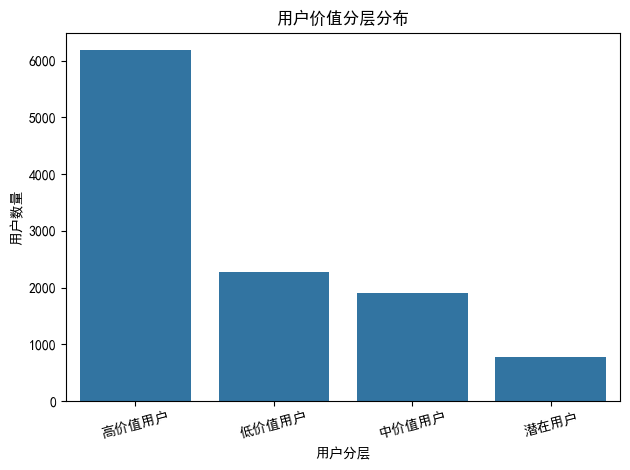

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 用户分层分布
sns.countplot(data=user_behavior, x='segment', order=user_behavior['segment'].value_counts().index)
plt.title('用户价值分层分布')
plt.xlabel('用户分层')
plt.ylabel('用户数量')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [8]:
# 先按用户和时间排序
df = df.sort_values(by=['user_id', 'time'])

# 获取每个用户的下一个行为
df['next_behavior'] = df.groupby('user_id')['behavior_type'].shift(-1)

# 构造行为路径
df['behavior_path'] = df['behavior_type'].astype(str) + '->' + df['next_behavior'].astype(str)

# 去除无效路径（如下一个行为为空）
valid_paths = df.dropna(subset=['next_behavior'])

# 统计行为路径的频率
path_counts = valid_paths['behavior_path'].value_counts().reset_index()
path_counts.columns = ['behavior_path', 'count']
print(path_counts.head(10))


  behavior_path     count
0          1->1  10941918
1          1->3    291566
2          3->1    291188
3          2->1    215452
4          1->2    215434
5          4->1     91458
6          1->4     91127
7          3->3     37317
8          2->2     22790
9          4->4     16127


In [9]:
# 先找出用户的首次行为和首次购买的时间
df['time'] = pd.to_datetime(df['time'])

# 获取用户首次行为时间
first_action = df.groupby('user_id')['time'].min().reset_index().rename(columns={'time': 'first_action_time'})

# 获取用户首次购买行为时间
first_purchase = df[df['behavior_type'] == 4].groupby('user_id')['time'].min().reset_index().rename(columns={'time': 'first_purchase_time'})

# 合并
df_user = pd.merge(first_action, first_purchase, on='user_id', how='inner')

# 计算时间差（秒）
df_user['time_to_purchase'] = (df_user['first_purchase_time'] - df_user['first_action_time']).dt.total_seconds() / 3600  # 以小时为单位

# 查看平均、中位时间
print("平均购买时长（小时）:", df_user['time_to_purchase'].mean())
print("中位购买时长（小时）:", df_user['time_to_purchase'].median())


平均购买时长（小时）: 141.41228169014084
中位购买时长（小时）: 75.0


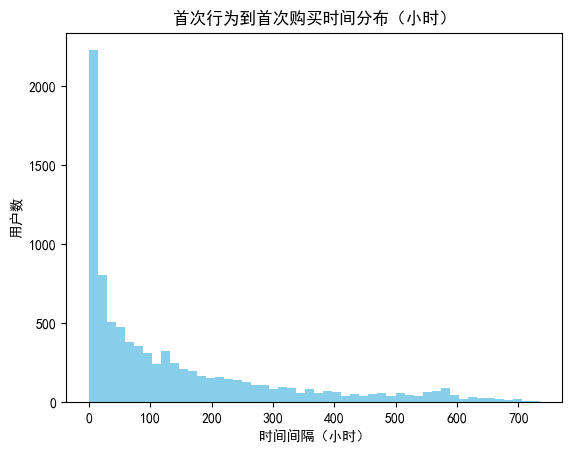

In [10]:
import matplotlib.pyplot as plt
plt.hist(df_user['time_to_purchase'], bins=50, color='skyblue')
plt.title('首次行为到首次购买时间分布（小时）')
plt.xlabel('时间间隔（小时）')
plt.ylabel('用户数')
plt.show()


In [11]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# 读取数据
df['time'] = pd.to_datetime(df['time'])

# 为行为添加名称映射
behavior_map = {1: "浏览", 2: "收藏", 3: "加购", 4: "购买"}
df['behavior_type'] = df['behavior_type'].map(behavior_map)

# 取用户前几次行为形成序列（避免超长路径）
df = df.sort_values(by=["user_id", "time"])
df["next_behavior"] = df.groupby("user_id")["behavior_type"].shift(-1)

# 构造路径对（当前行为 ➜ 下一个行为）
path_df = df.dropna(subset=["next_behavior"])
path_counts = path_df.groupby(["behavior_type", "next_behavior"]).size().reset_index(name="count")

# 构造 Sankey 所需格式
labels = list(set(path_counts['behavior_type']) | set(path_counts['next_behavior']))
label_index = {label: i for i, label in enumerate(labels)}

sources = path_counts['behavior_type'].map(label_index)
targets = path_counts['next_behavior'].map(label_index)
values = path_counts['count']

# 画 Sankey 图
fig = go.Figure(data=[go.Sankey(
    node=dict(label=labels, pad=15, thickness=20, line=dict(color="black", width=0.5)),
    link=dict(source=sources, target=targets, value=values)
)])
fig.update_layout(title_text="用户行为路径流向图", font_size=14)
fig.show()


C:\Users\21711\AppData\Local\Temp\ipykernel_28380\403318231.py:6: DtypeWarning:

Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\21711\AppData\Local\Temp\ipykernel_28380\403318231.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\21711\AppData\Local\Temp\ipykernel_28380\403318231.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\21711\AppData\Local\Temp\ipykernel_28380\403318231.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\21711\AppData\Local\Temp\ipykernel_28380\403318231.py:16: Fut

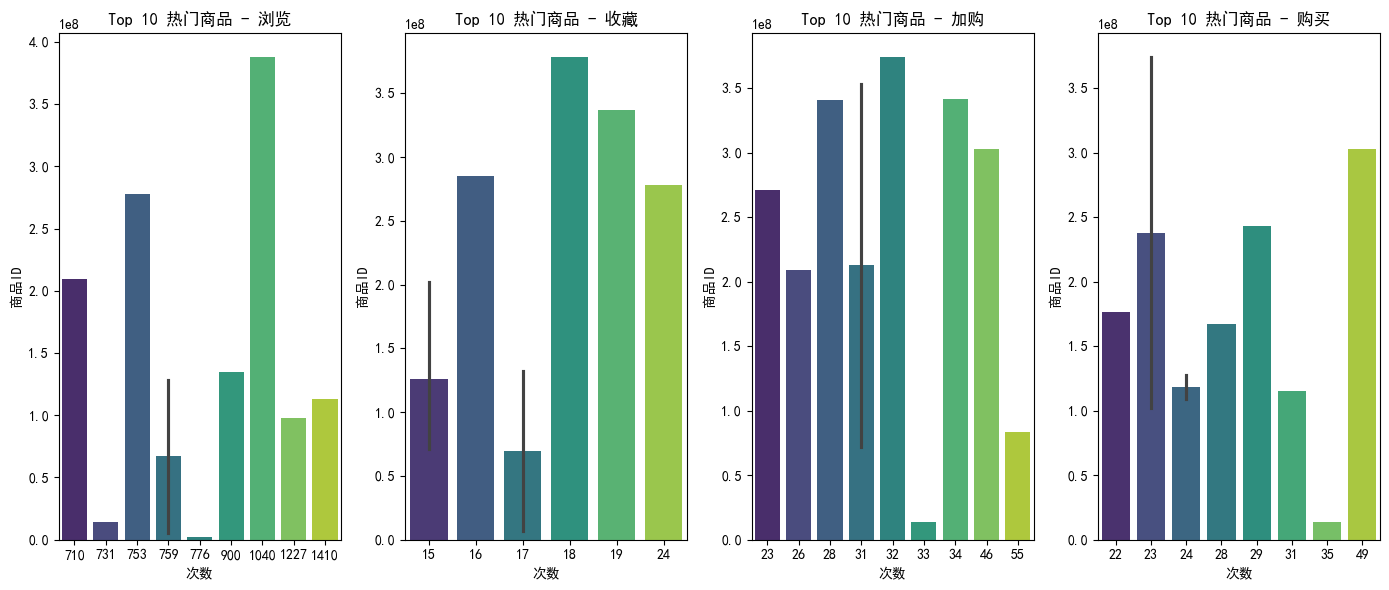

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设你已经加载数据：
df = pd.read_csv('user_action.csv', names=['user_id','item_id','behavior_type','item_category','time'])
# 并进行了基础处理（如时间字段解析）

# 不同行为类型
behavior_map = {1: '浏览', 2: '收藏', 3: '加购', 4: '购买'}

plt.figure(figsize=(14, 6))
for i, b_type in enumerate([1, 2, 3, 4], 1):
    top_items = df[df['behavior_type'] == b_type]['item_id'].value_counts().head(10)
    plt.subplot(1, 4, i)
    sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')
    plt.title(f'Top 10 热门商品 - {behavior_map[b_type]}')
    plt.xlabel('次数')
    plt.ylabel('商品ID')

plt.tight_layout()
plt.show()
